In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np

from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.pyplot as plt
import pydeck as pdk

## 1차 클러스터링
목표: 산 & 강 분류하기

토지 복합도, 압축도를 이용하여 KMeans 클러스터링을 통해 산, 강 구분

In [2]:
Main = pd.read_excel('../../데이터/입지분석/Main.xlsx')
Main

,gid,인구수,충전소_접근성,압축도,복합도,공원,교통량,건축물수,공시지가,parking_access,주거용도면적
0,다사58b60a,4336,0.209,150.89,11,0.301,0,144,2960769.00,0.125,182.44
1,다사60b61b,295,2.541,41.19,5,1.836,489270,2,4140200.34,2.390,0.00
2,다사58b59b,120,0.236,116.56,14,0.437,138574,15,1921112.93,0.195,247.54
3,다사59b65b,442,0.487,22.48,10,0.468,49079,102,839038.11,0.463,157.87
4,다사60a62a,9367,0.318,163.15,10,1.008,24686,62,3290037.50,0.348,0.00
...,...,...,...,...,...,...,...,...,...,...,...
2415,다사54b47b,0,0.682,0.00,0,0.949,0,0,3180000.03,0.900,0.00
2416,다사53a46a,0,2.965,0.00,0,2.828,0,0,516499.99,0.472,0.00
2417,다사54a48b,0,0.967,0.00,0,0.910,61182,0,3148448.13,0.763,0.00
2418,다사54a47b,0,1.177,0.00,0,0.896,0,0,3179999.98,2.386,0.00


c:\Users\ms964\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


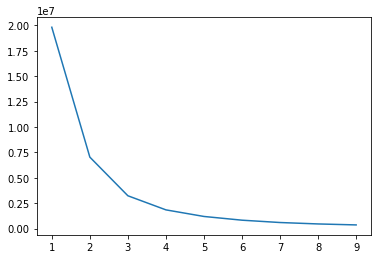

In [3]:
KS = range(1, 10)
inertia = list()

x = Main[['gid', '압축도', '복합도']]
x = x.set_index('gid')

for k in KS:
    model_test = KMeans(k)
    predict_test = model_test.fit(x)
    inertia.append(predict_test.inertia_)

sns.lineplot(KS, inertia)
plt.show()

In [4]:
model = KMeans(3, n_init=20, random_state=42)
predict = model.fit(x)

In [5]:
x.loc[:,'predict'] = predict.labels_

In [6]:
x.groupby('predict')['압축도', '복합도'].mean()

C:\Users\ms964\AppData\Local\Temp\ipykernel_27508\2491448062.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  x.groupby('predict')['압축도', '복합도'].mean()


,압축도,복합도
predict,,
0,140.651811,9.980591
1,20.116215,3.560764
2,300.482527,10.274194


In [7]:
# grid 정보 불러오기
grid = gpd.read_file('../../데이터/입지분석/전기차충전소/시범 전기차충전소(시군구격자) 접근성.shp', encoding = 'utf8')
grid

,gid,sgg_nm_k,sgg_nm_e,sgg_cd,sido_nm_k,sido_nm_e,sido_cd,value,stats_year,raw_d_year,geometry
0,다사55a53b,종로구,Jongno-gu,11110,서울특별시,Seoul,11,1.609,2021,202112,"POLYGON ((955000.000 1953500.000, 955000.000 1..."
1,다사53a53a,종로구,Jongno-gu,11110,서울특별시,Seoul,11,0.402,2021,202112,"POLYGON ((953000.000 1953000.000, 953000.000 1..."
2,다사52b53a,종로구,Jongno-gu,11110,서울특별시,Seoul,11,0.535,2021,202112,"POLYGON ((952500.000 1953000.000, 952500.000 1..."
3,다사53a57b,종로구,Jongno-gu,11110,서울특별시,Seoul,11,1.357,2021,202112,"POLYGON ((953000.000 1957500.000, 953000.000 1..."
4,다사53a54b,종로구,Jongno-gu,11110,서울특별시,Seoul,11,0.701,2021,202112,"POLYGON ((953000.000 1954500.000, 953000.000 1..."
...,...,...,...,...,...,...,...,...,...,...,...
419167,나바98a83b,None,None,None,None,None,None,7.706,2021,202112,"POLYGON ((898000.000 1883500.000, 898000.000 1..."
419168,마바76a57a,None,None,None,None,None,None,3.802,2021,202112,"POLYGON ((1176000.000 1857000.000, 1176000.000..."
419169,나바97a87b,None,None,None,None,None,None,4.755,2021,202112,"POLYGON ((897000.000 1887500.000, 897000.000 1..."
419170,나바97a25b,None,None,None,None,None,None,0.662,2021,202112,"POLYGON ((897000.000 1825500.000, 897000.000 1..."


In [8]:
grid = grid[grid['sido_nm_k'] == '서울특별시']
grid = grid[['gid', 'geometry']]

grid

,gid,geometry
0,다사55a53b,"POLYGON ((955000.000 1953500.000, 955000.000 1..."
1,다사53a53a,"POLYGON ((953000.000 1953000.000, 953000.000 1..."
2,다사52b53a,"POLYGON ((952500.000 1953000.000, 952500.000 1..."
3,다사53a57b,"POLYGON ((953000.000 1957500.000, 953000.000 1..."
4,다사53a54b,"POLYGON ((953000.000 1954500.000, 953000.000 1..."
...,...,...
2415,다사70b52a,"POLYGON ((970500.000 1952000.000, 970500.000 1..."
2416,다사67b48a,"POLYGON ((967500.000 1948000.000, 967500.000 1..."
2417,다사68a47a,"POLYGON ((968000.000 1947000.000, 968000.000 1..."
2418,다사68a51a,"POLYGON ((968000.000 1951000.000, 968000.000 1..."


In [9]:
def polygon_to_coordinates(x): 
    lon, lat = x.exterior.xy 
    return [[x, y] for x, y in zip(lon, lat)]

In [10]:
grid = grid.to_crs(epsg = 4326)
grid['coordinates'] = grid['geometry'].apply(polygon_to_coordinates)
grid = grid.set_index('gid')
grid

,geometry,coordinates
gid,,
다사55a53b,"POLYGON ((126.99035 37.57979, 126.99032 37.584...","[[126.99035203836993, 37.57978500226289], [126..."
다사53a53a,"POLYGON ((126.96773 37.57518, 126.96770 37.579...","[[126.96773397496594, 37.57517845860917], [126..."
다사52b53a,"POLYGON ((126.96207 37.57515, 126.96204 37.579...","[[126.9620717979233, 37.575152792602694], [126..."
다사53a57b,"POLYGON ((126.96744 37.61574, 126.96741 37.620...","[[126.9674449940854, 37.615737545688575], [126..."
다사53a54b,"POLYGON ((126.96764 37.58870, 126.96761 37.593...","[[126.96763771237315, 37.58869818555969], [126..."
...,...,...
다사70b52a,"POLYGON ((127.16595 37.56689, 127.16593 37.571...","[[127.16595438985028, 37.56689227220022], [127..."
다사67b48a,"POLYGON ((127.13216 37.53074, 127.13214 37.535...","[[127.13216147862678, 37.5307376437907], [127...."
다사68a47a,"POLYGON ((127.13786 37.52174, 127.13784 37.526...","[[127.1378640024237, 37.52174168809255], [127...."


In [11]:
graph = grid.join(x)

graph

,geometry,coordinates,압축도,복합도,predict
gid,,,,,
다사55a53b,"POLYGON ((126.99035 37.57979, 126.99032 37.584...","[[126.99035203836993, 37.57978500226289], [126...",1.03,2,1
다사53a53a,"POLYGON ((126.96773 37.57518, 126.96770 37.579...","[[126.96773397496594, 37.57517845860917], [126...",92.83,13,0
다사52b53a,"POLYGON ((126.96207 37.57515, 126.96204 37.579...","[[126.9620717979233, 37.575152792602694], [126...",35.05,10,1
다사53a57b,"POLYGON ((126.96744 37.61574, 126.96741 37.620...","[[126.9674449940854, 37.615737545688575], [126...",0.00,0,1
다사53a54b,"POLYGON ((126.96764 37.58870, 126.96761 37.593...","[[126.96763771237315, 37.58869818555969], [126...",33.11,6,1
...,...,...,...,...,...
다사70b52a,"POLYGON ((127.16595 37.56689, 127.16593 37.571...","[[127.16595438985028, 37.56689227220022], [127...",52.86,3,1
다사67b48a,"POLYGON ((127.13216 37.53074, 127.13214 37.535...","[[127.13216147862678, 37.5307376437907], [127....",186.03,15,0
다사68a47a,"POLYGON ((127.13786 37.52174, 127.13784 37.526...","[[127.1378640024237, 37.52174168809255], [127....",2.88,1,1


In [12]:
layer = pdk.Layer(
    'PolygonLayer', # 사용할 Layer 타입
    graph[graph['predict'] == 1], # 시각화에 쓰일 데이터프레임
    get_polygon='coordinates', # geometry 정보를 담고있는 컬럼 이름
    get_fill_color='[127*predict, 127*predict,255,100]', # 각 데이터 별 rgb 또는 rgba 값 (0~255)
    pickable=True, # 지도와 interactive 한 동작 on
    auto_highlight=True # 마우스 오버(hover) 시 박스 출력
    ,coverage = 1
)

center_seoul = [127.001699, 37.564214]

view_state = pdk.ViewState(
    longitude=center_seoul[0],
    latitude=center_seoul[1],
    zoom=10)

r = pdk.Deck(layers=[layer], initial_view_state=view_state)
r.show()

DeckGLWidget(carto_key=None, custom_libraries=[], google_maps_key=None, json_input='{"initialViewState": {"lat…

### 시각화 EDA 결과
- 산, 강은 모두 제외할 수 있었다.
- 대학교, 공원 등이 포함되었지만 전기차 충전소 입지는 아니라 판단되어 제외하였다.

In [13]:
cluster1_result = x[x['predict'] != 1]
cluster1_result

,압축도,복합도,predict
gid,,,
다사58b60a,150.89,11,0
다사58b59b,116.56,14,0
다사60a62a,163.15,10,0
다사60a64b,110.25,10,0
다사58a62a,184.96,6,0
...,...,...,...
다사55a48a,134.77,12,0
다사53a47a,273.37,7,2
다사55b48b,130.08,11,0


## 1.5차 클러스터링

### 완속충전을 하는 경우

1. 거주지
   - 주민등록인구 ↑
   - 격자별 연령별 인구수 * 연령별 자동차 등록 비율 ↑ 
   - 주거용도면적 ↑ -> 거주지 판별

> 인구수, 주거용도면적, 자동차등록대수

> 참고용: 공동주택(위치)


1. 직장
   - 직장인구 ↑ -> 직장 다니는 인구도 많아야 함
   - 주간유동인구 ↑ -> 사람이 많이 다녀야 함
   - 
   - 복합도 ↑ -> 직장임을 확인

In [14]:
pop = pd.read_excel('../../데이터/입지분석/인구수_완.xlsx', index_col=0)
floating_pop = pd.read_excel('../../데이터/입지분석/유동인구/주간유동인구.xlsx', index_col = 0)
job_pop = pd.read_excel('../../데이터/입지분석/기타/직장인구_1차클러스터링.xlsx', index_col = 0)
house_pop = pd.read_excel('../../데이터/입지분석/기타/주거인구_1차클러스터링.xlsx', index_col = 0)
shop = pd.read_excel('../../데이터/입지분석/상권/상권유무.xlsx', index_col=0)
charger = pd.read_excel('../../데이터/입지분석/전기차충전소/완속충전소개수.xlsx', index_col = 0)
corp = pd.read_excel('../../데이터/입지분석/기타/사업체수_1차클러스터링.xlsx', index_col = 0)
age_pop = pd.read_excel('../../데이터/입지분석/기타/연령별_인구.xlsx', index_col = 1)
morning_traffic = pd.read_excel('../../데이터/입지분석/교통량/아침교통량_1차클러스터링.xlsx', index_col = 0)
social_welfare = pd.read_excel('../../데이터/입지분석/기타/social_welfare_center.xlsx', index_col = 1)
training_center = pd.read_excel('../../데이터/입지분석/기타/training_facilities.xlsx', index_col = 1)


training_center

,Unnamed: 0,value
gid,,
다사52b53a,0,0.208
다사53b55b,1,3.501
다사53b52b,2,1.402
다사53a57b,3,4.854
다사55a53b,4,2.483
...,...,...
다사68a48b,2415,1.816
다사69a49b,2416,0.744
다사68a49a,2417,1.279


In [47]:
pop

,인구수
gid,
다사58b60a,4336.0
다사58b59b,120.0
다사60a62a,9367.0
다사60a64b,7115.0
다사58a62a,13256.0
...,...
다사55a48a,4421.0
다사53a47a,9881.0
다사55b48b,1043.0


c:\Users\ms964\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

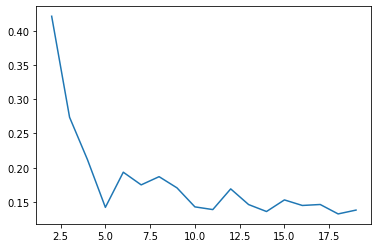

In [15]:
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

cluster1 = floating_pop.join([job_pop, corp], how = 'inner')
cluster1 = cluster1.fillna(0)
cluster1 = cluster1[(cluster1['주간유동인구'] > 1171.390765) & (cluster1['직장인구'] > 2785.646089)]


robust = RobustScaler()
robustscaled_cluster1 = robust.fit_transform(cluster1)
robustscaled_cluster1 = pd.DataFrame(robustscaled_cluster1, columns=cluster1.columns, index=cluster1.index)
roubust_inertia = list()

KS = range(2, 20)
for k in KS:
    km = KMedoids(n_clusters = k)
    test_predict = km.fit(robustscaled_cluster1[['사업체수', '주간유동인구', '직장인구']])
    roubust_inertia.append(silhouette_score(robustscaled_cluster1[['사업체수', '주간유동인구', '직장인구']], test_predict.labels_, metric='euclidean'))

sns.lineplot(KS, roubust_inertia)

In [16]:
km = KMedoids(n_clusters = 2, random_state=20)
test_predict = km.fit(robustscaled_cluster1[['사업체수', '주간유동인구', '직장인구']])

cluster1['predict'] = test_predict.labels_

cluster1

,주간유동인구,직장인구,사업체수,predict
gid,,,,
다사59b63a,3845.981001,2991.57118,770,0
다사60a61b,6562.831414,5110.57992,818,0
다사60a63a,3971.489462,3103.76244,210,0
다사61b51a,23061.338598,4955.04561,904,0
다사58a53a,8562.475328,4805.82642,717,0
...,...,...,...,...
다사52a48a,1985.843808,4365.78011,1038,0
다사52b48a,33591.259414,8368.09137,1453,1
다사53a49b,24170.537125,3503.23665,709,0


In [17]:
cluster1.groupby('predict')['사업체수', '주간유동인구', '직장인구'].mean()

C:\Users\ms964\AppData\Local\Temp\ipykernel_27508\1926529114.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cluster1.groupby('predict')['사업체수', '주간유동인구', '직장인구'].mean()


,사업체수,주간유동인구,직장인구
predict,,,
0,717.510638,13416.920389,4271.878983
1,1623.992481,71250.268140,10889.171600


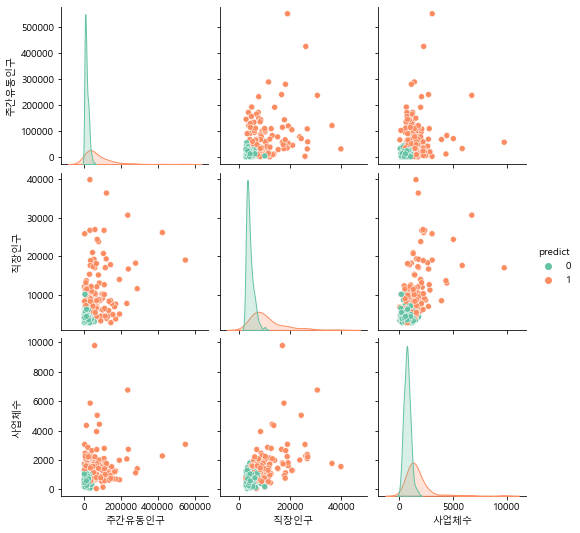

In [18]:
plt.rcParams['font.family'] = 'malgun Gothic'
sns.pairplot(cluster1, hue = 'predict',palette= 'Set2')

In [19]:
cluster1 = cluster1[cluster1['predict'] == 1]
cluster1_result = cluster1.join(charger, how = 'inner')

In [20]:
cluster1_result = cluster1_result[cluster1_result['충전소개수'] <= 1]
cluster1_result

,주간유동인구,직장인구,사업체수,predict,충전소개수
gid,,,,,
다사50b46a,191942.586882,5033.69541,645,1,0
다사54a42a,171259.449465,7611.89591,1240,1,0
다사59b42a,19167.316370,11234.32052,1222,1,1
다사57b45a,35758.292644,10504.47280,1267,1,1
다사58b43a,29338.953783,10345.50126,1128,1,0
다사58a44b,287915.513927,11596.58379,1399,1,0
다사57b47a,49141.364046,4375.23985,820,1,1
다사61b45b,14253.207140,12336.48568,444,1,1
다사59b41b,23744.782088,5901.65840,1214,1,1


In [21]:
graph_job = grid.join(cluster1_result, how = 'inner')

In [22]:
layer = pdk.Layer(
    'PolygonLayer', # 사용할 Layer 타입
    graph_job, # 시각화에 쓰일 데이터프레임
    get_polygon='coordinates', # geometry 정보를 담고있는 컬럼 이름
    get_fill_color= '[255, 100,100,155]', # 각 데이터 별 rgb 또는 rgba 값 (0~255)
    pickable=True, # 지도와 interactive 한 동작 on
    auto_highlight=True # 마우스 오버(hover) 시 박스 출력
    ,coverage = 1
)

center_seoul = [127.001699, 37.564214]

view_state = pdk.ViewState(
    longitude=center_seoul[0],
    latitude=center_seoul[1],
    zoom=10)
# mapbox://styles/mapbox/outdoors-v11
r = pdk.Deck(layers=[layer], initial_view_state=view_state)
r.to_html('../../이미지/입지분석/완속충전소입지선정.html')

### 거주지

c:\Users\ms964\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

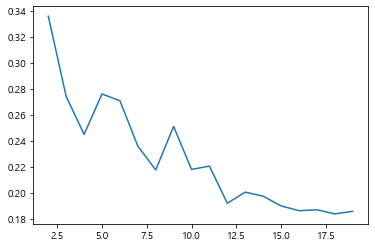

In [23]:
KS = range(2, 20)

cluster2 = pop.join([shop, house_pop, age_pop['총합계']], how = 'inner')
cluster2 = cluster2.fillna(0)
cluster2 = cluster2[cluster2['상권유무'] == False]
cluster2 = cluster2.drop('상권유무', axis = 1)
cluster2 = cluster2[cluster2['주거인구'] > 4873.290000]

robust = RobustScaler()
robustscaled_cluster2 = robust.fit_transform(cluster2)
robustscaled_cluster2 = pd.DataFrame(robustscaled_cluster2, columns=cluster2.columns, index=cluster2.index)
roubust_inertia = list()

for k in KS:
    km = KMedoids(n_clusters = k)
    test_predict = km.fit(robustscaled_cluster2[['인구수', '주거인구', '총합계']])
    roubust_inertia.append(silhouette_score(robustscaled_cluster2[['인구수', '주거인구', '총합계']], test_predict.labels_, metric='euclidean'))

sns.lineplot(KS, roubust_inertia)

In [24]:
km = KMedoids(n_clusters = 2, random_state=20)
test_predict = km.fit(robustscaled_cluster2[['주거인구', '인구수', '총합계']])

cluster2['predict'] = test_predict.labels_

cluster2

,인구수,주거인구,총합계,predict
gid,,,,
다사58b60a,4336.0,10340.09,500.827538,0
다사58b59b,120.0,6246.83,15.995849,0
다사60a62a,9367.0,10492.63,1115.456398,1
다사60a64b,7115.0,7271.90,821.307004,1
다사58a62a,13256.0,13282.66,1577.765106,1
...,...,...,...,...
다사54b49a,5065.0,5846.10,543.525246,0
다사52a47a,4236.0,5071.23,485.824782,0
다사53b46b,7887.0,8215.37,62.947351,0


In [25]:
cluster2.groupby('predict')['주거인구', '인구수', '총합계'].mean()

C:\Users\ms964\AppData\Local\Temp\ipykernel_27508\4170393940.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cluster2.groupby('predict')['주거인구', '인구수', '총합계'].mean()


,주거인구,인구수,총합계
predict,,,
0,6817.21672,5073.350318,515.930944
1,9579.12136,9231.546828,920.283019


In [26]:
cluster2.corr()

,인구수,주거인구,총합계,predict
인구수,1.000000,0.456921,0.437949,0.682507
주거인구,0.456921,1.000000,0.290898,0.569079
총합계,0.437949,0.290898,1.000000,0.586984
predict,0.682507,0.569079,0.586984,1.000000


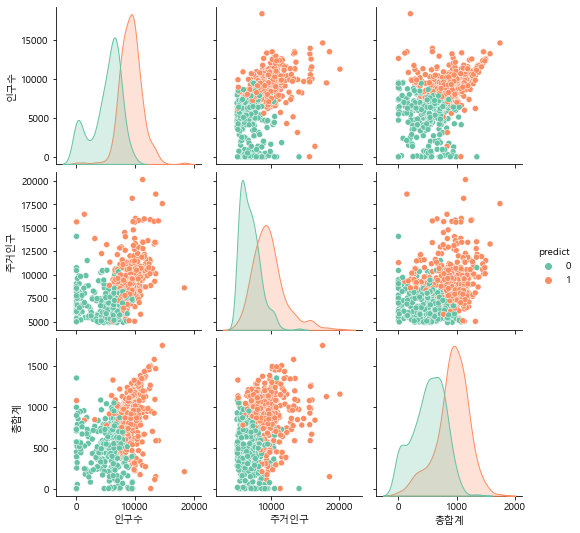

In [27]:
plt.rcParams['font.family'] = 'malgun Gothic'
sns.pairplot(cluster2, hue = 'predict',palette= 'Set2')

In [28]:
cluster2_result = cluster2[cluster2['predict'] == 1]

cluster2_result

,인구수,주거인구,총합계,predict
gid,,,,
다사60a62a,9367.0,10492.63,1115.456398,1
다사60a64b,7115.0,7271.90,821.307004,1
다사58a62a,13256.0,13282.66,1577.765106,1
다사60a65a,9172.0,10781.11,1073.403888,1
다사59a62b,8943.0,7239.87,1090.460727,1
...,...,...,...,...
다사45b46b,10928.0,5789.84,774.979279,1
다사48a45a,9146.0,9021.11,1196.639041,1
다사53a48b,8956.0,5100.60,1107.497101,1


In [29]:
graph_residence = grid.join(cluster2_result, how = 'inner')

In [30]:
layer = pdk.Layer(
    'PolygonLayer', # 사용할 Layer 타입
    graph_residence, # 시각화에 쓰일 데이터프레임
    get_polygon='coordinates', # geometry 정보를 담고있는 컬럼 이름
    get_fill_color= '[255, 100,100,155]', # 각 데이터 별 rgb 또는 rgba 값 (0~255)
    pickable=True, # 지도와 interactive 한 동작 on
    auto_highlight=True # 마우스 오버(hover) 시 박스 출력
    ,coverage = 1
)

center_seoul = [127.001699, 37.564214]

view_state = pdk.ViewState(
    longitude=center_seoul[0],
    latitude=center_seoul[1],
    zoom=10)
# mapbox://styles/mapbox/outdoors-v11
r = pdk.Deck(layers=[layer], initial_view_state=view_state)
r.show()

DeckGLWidget(carto_key=None, custom_libraries=[], google_maps_key=None, json_input='{"initialViewState": {"lat…

In [31]:
training_center = training_center.drop('Unnamed: 0', axis=1)
social_welfare = social_welfare.drop('Unnamed: 0', axis=1)

training_center.columns = ['체육시설거리']
social_welfare.columns = ['복지관거리']

In [32]:
cluster2_resi = cluster2_result.join([charger, morning_traffic, training_center, social_welfare], how = 'inner')
cluster2_resi = cluster2_resi.drop(['인구수', '주거인구', '총합계', 'predict', '충전소개수'], axis = 1)

In [33]:
for index in cluster2_resi.index:
    cluster2_resi.at[index, '공공시설접근성'] = min(cluster2_resi.at[index, '체육시설거리'], cluster2_resi.at[index, '복지관거리'])

cluster2_resi = cluster2_resi[['08~10시_교통량', '공공시설접근성']]
cluster2_resi

,08~10시_교통량,공공시설접근성
gid,,
다사60a62a,4363,0.483
다사60a64b,19312,0.769
다사58a62a,15488,1.985
다사60a65a,2525,0.194
다사59a62b,8745,0.879
...,...,...
다사45b46b,10033,1.071
다사48a45a,4152,1.388
다사53a48b,44482,1.001


c:\Users\ms964\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

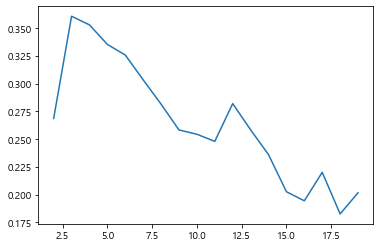

In [34]:
robust = RobustScaler()
scaled_cluster2_resi = robust.fit_transform(cluster2_resi)
scaled_cluster2_resi = pd.DataFrame(scaled_cluster2_resi, columns=cluster2_resi.columns, index=cluster2_resi.index)
roubust_inertia = list()

KS = range(2, 20)
for k in KS:
    km = KMedoids(n_clusters = k)
    test_predict = km.fit(scaled_cluster2_resi)
    roubust_inertia.append(silhouette_score(scaled_cluster2_resi, test_predict.labels_, metric='euclidean'))

sns.lineplot(KS, roubust_inertia)

In [35]:
km = KMedoids(n_clusters = 4)
test_predict = km.fit(scaled_cluster2_resi)
cluster2_resi['predict'] = test_predict.labels_

cluster2_resi

,08~10시_교통량,공공시설접근성,predict
gid,,,
다사60a62a,4363,0.483,0
다사60a64b,19312,0.769,0
다사58a62a,15488,1.985,2
다사60a65a,2525,0.194,0
다사59a62b,8745,0.879,0
...,...,...,...
다사45b46b,10033,1.071,1
다사48a45a,4152,1.388,1
다사53a48b,44482,1.001,3


In [36]:
cluster2_resi.groupby('predict')['08~10시_교통량', '공공시설접근성'].count()

C:\Users\ms964\AppData\Local\Temp\ipykernel_27508\1384370424.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cluster2_resi.groupby('predict')['08~10시_교통량', '공공시설접근성'].count()


,08~10시_교통량,공공시설접근성
predict,,
0,123,123
1,82,82
2,81,81
3,45,45


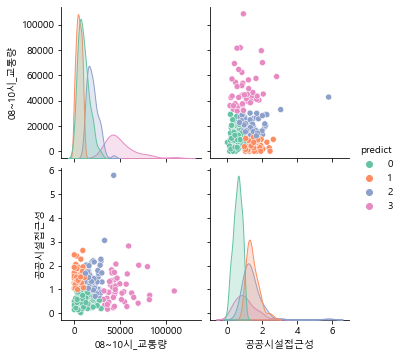

In [37]:
plt.rcParams['font.family'] = 'malgun Gothic'
sns.pairplot(cluster2_resi, hue = 'predict',palette= 'Set2')

In [38]:
cluster2_resi = cluster2_resi[cluster2_resi['predict'] == 3]
cluster2_resi.head()

,08~10시_교통량,공공시설접근성,predict
gid,,,
다사60a52b,43358,1.401,3
다사51a45a,81777,0.759,3
다사48a55b,33107,0.357,3
다사59b44a,40423,1.822,3
다사61b44a,45076,1.151,3


In [39]:
test = cluster2_resi.join(charger, how = 'inner')

final_slow_resi = test[test['충전소개수'] <= 2]

인구밀도 = 주거인구 / 연면적


In [40]:
graph_resi = grid.join(final_slow_resi, how = 'inner')

In [41]:
layer = pdk.Layer(
    'PolygonLayer', # 사용할 Layer 타입
    graph_resi, # 시각화에 쓰일 데이터프레임
    get_polygon='coordinates', # geometry 정보를 담고있는 컬럼 이름
    get_fill_color= '[255, 100,100,155]', # 각 데이터 별 rgb 또는 rgba 값 (0~255)
    pickable=True, # 지도와 interactive 한 동작 on
    auto_highlight=True # 마우스 오버(hover) 시 박스 출력
    ,coverage = 1
)

center_seoul = [127.001699, 37.564214]

view_state = pdk.ViewState(
    longitude=center_seoul[0],
    latitude=center_seoul[1],
    zoom=10)
# mapbox://styles/mapbox/outdoors-v11
r = pdk.Deck(layers=[layer], initial_view_state=view_state)
r.to_html('../../이미지/입지분석/거주지완속충전소입지선정.html')

In [42]:
cluster1_result['직장'] = True
cluster1_result = cluster1_result.drop(['주간유동인구', '직장인구', '사업체수', 'predict', '충전소개수'], axis = 1)
final_slow_resi['거주지'] = True
final_slow_resi = final_slow_resi.drop(['08~10시_교통량', '공공시설접근성', 'predict', '충전소개수'], axis = 1)

C:\Users\ms964\AppData\Local\Temp\ipykernel_27508\4103746403.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_slow_resi['거주지'] = True


In [43]:
final_slow = final_slow_resi.append(cluster1_result)
final_slow

C:\Users\ms964\AppData\Local\Temp\ipykernel_27508\3184012554.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_slow = final_slow_resi.append(cluster1_result)


,거주지,직장
gid,,
다사60a52b,True,NaN
다사51a45a,True,NaN
다사61b44a,True,NaN
다사38b52b,True,NaN
다사43a51b,True,NaN
...,...,...
다사57a54b,NaN,True
다사47b46b,NaN,True
다사49b47a,NaN,True


In [44]:
final_slow = final_slow.loc[~final_slow.index.duplicated(keep='first')]

final_slow = final_slow.fillna(False)

final_slow

,거주지,직장
gid,,
다사60a52b,True,False
다사51a45a,True,False
다사61b44a,True,False
다사38b52b,True,False
다사43a51b,True,False
...,...,...
다사57a54b,False,True
다사47b46b,False,True
다사49b47a,False,True


In [45]:
slow_graph = grid.join(final_slow, how = 'inner')

In [46]:
layer = pdk.Layer(
    'PolygonLayer', # 사용할 Layer 타입
    slow_graph, # 시각화에 쓰일 데이터프레임
    get_polygon='coordinates', # geometry 정보를 담고있는 컬럼 이름
    get_fill_color= '[255, 100,100,155]', # 각 데이터 별 rgb 또는 rgba 값 (0~255)
    pickable=True, # 지도와 interactive 한 동작 on
    auto_highlight=True # 마우스 오버(hover) 시 박스 출력
    ,coverage = 1
)

center_seoul = [127.001699, 37.564214]

view_state = pdk.ViewState(
    longitude=center_seoul[0],
    latitude=center_seoul[1],
    zoom=10)
# mapbox://styles/mapbox/outdoors-v11
r = pdk.Deck(layers=[layer], initial_view_state=view_state)
r.to_html('../../이미지/입지분석/완속충전소입지선정.html')